In [188]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing, decomposition
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
import os
import numpy as np
import matplotlib.pyplot as plt 
import plotly as py
import seaborn as sns
warnings.filterwarnings("ignore")

In [189]:
df = pd.read_csv('Train.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [190]:
# 전체 data 개수 대비 NaN의 비율

(df.isnull().sum() / len(df)) * 100

ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

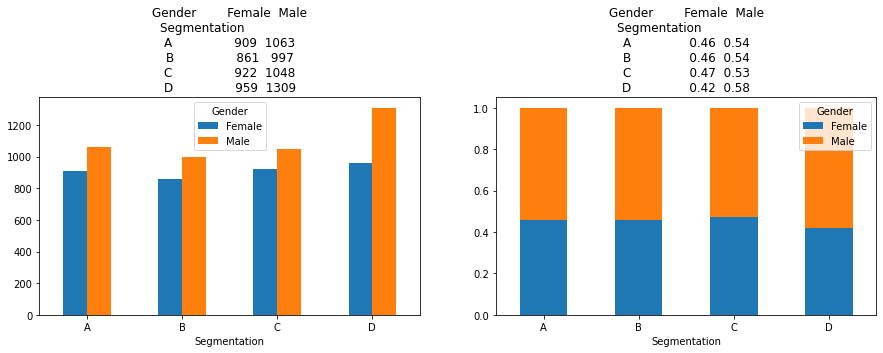

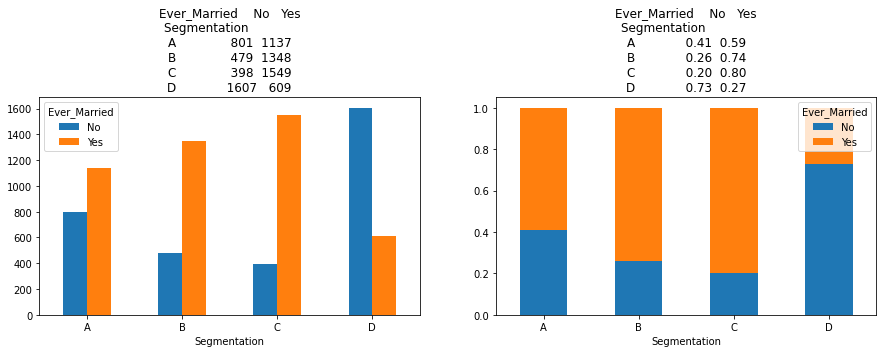

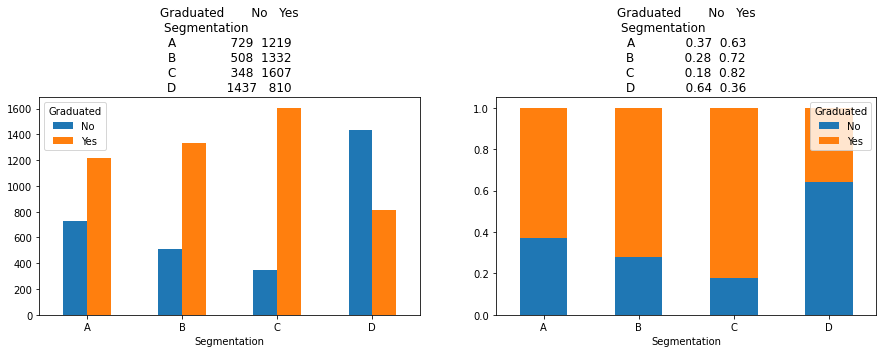

In [191]:
'''
Segmentation & Gender
'''
# Counting graduate and non-graduate in each segment
ax1 = df.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of graduate and non-graduate in each segment
ax2 = df.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))

'''
Segmentation & Ever_Married
'''
# Counting graduate and non-graduate in each segment
ax1 = df.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

# Percentage of graduate and non-graduate in each segment
ax2 = df.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))


'''
Segmentation & Graduated
'''

# Counting graduate and non-graduate in each segment
ax1 = df.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

# Percentage of graduate and non-graduate in each segment
ax2 = df.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))


plt.show()

In [192]:
# replace blank values with mode 
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [193]:
for i in ['Gender' , 'Ever_Married' , 'Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1'  ]:
    print(f"Column {i} unique values {df[i].unique()}")

Column Gender unique values ['Male' 'Female']
Column Ever_Married unique values ['No' 'Yes']
Column Age unique values [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Column Graduated unique values ['No' 'Yes']
Column Profession unique values ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']
Column Work_Experience unique values [ 1.  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Column Spending_Score unique values ['Low' 'Average' 'High']
Column Family_Size unique values [4. 3. 1. 2. 6. 5. 8. 7. 9.]
Column Var_1 unique values ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']


In [194]:
# # encode variables with label encoding

# label_encoder = preprocessing.LabelEncoder()
# for i in ['Gender' , 'Ever_Married', 'Graduated','Profession', 'Spending_Score', 'Var_1', 'Segmentation']:
#     df[i]= label_encoder.fit_transform(df[i])
# df

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Gender','Ever_Married','Graduated','Age','Profession','Work_Experience','Spending_Score','Family_Size','Var_1','Segmentation'])

df = encoder.fit_transform(df)

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,1,1,1,1,1,1,1,1,1
1,462643,2,2,2,2,2,1,2,2,1,2
2,466315,2,2,3,2,2,1,1,3,2,3
3,461735,1,2,3,2,3,2,3,4,2,3
4,462669,2,2,4,2,4,1,3,5,2,2


In [195]:
scaler = MinMaxScaler()
columns_to_normalize = ['Age','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,1,0.000000,1,0.000,0.000000,0.0,0.000,0.000000,1
1,462643,2,2,0.015152,2,0.125,0.000000,0.5,0.125,0.000000,2
2,466315,2,2,0.030303,2,0.125,0.000000,0.0,0.250,0.166667,3
3,461735,1,2,0.030303,2,0.250,0.071429,1.0,0.375,0.166667,3
4,462669,2,2,0.045455,2,0.375,0.000000,1.0,0.500,0.166667,2
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,1,0.000000,1,0.500,0.071429,0.0,0.875,0.666667,1
8064,464685,1,1,0.287879,1,0.625,0.357143,0.0,0.000,0.000000,1
8065,465406,2,1,0.090909,2,0.000,0.000000,0.0,0.250,0.166667,1
8066,467299,2,1,0.348485,2,0.000,0.000000,0.0,0.000,0.166667,3


In [196]:
# Declare feature vector and target variable
X = df.drop(['ID','Segmentation'], axis=1)

y = df['Segmentation']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# check the shape of X and Y
X_train.shape, X_test.shape

X_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
5015,1,2,0.242424,2,0.375,0.000000,0.0,0.375,0.166667
5755,1,2,0.954545,2,0.250,0.071429,1.0,0.375,0.166667
7781,2,1,0.363636,2,0.000,0.571429,0.0,0.125,0.166667
4518,2,2,0.515152,2,0.875,0.000000,0.0,0.250,0.500000
6195,1,1,0.151515,1,0.000,0.000000,0.0,0.500,0.000000


In [197]:
X_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
742,1,1,0.363636,2,0.375,0.000000,0.0,0.125,0.000000
2127,2,2,0.393939,2,0.375,0.071429,0.5,0.375,0.166667
2107,1,1,0.787879,2,0.000,0.142857,0.0,0.625,0.833333
2943,1,2,0.530303,2,0.375,0.000000,0.5,0.000,0.166667
4362,2,1,0.151515,1,0.375,0.000000,0.0,0.625,0.166667


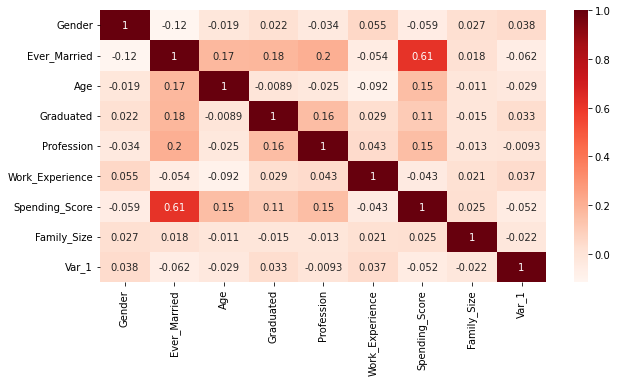

In [198]:
plt.figure(figsize=(10,5))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Decision Tree

Gender: 0.03944040533760078
Ever_Married: 0.01901834482537836
Age: 0.30709692678853817
Graduated: 0.035722823799211
Profession: 0.14687374867238756
Work_Experience: 0.164555061980232
Spending_Score: 0.06141276833434207
Family_Size: 0.13124956245100045
Var_1: 0.0946303578113097


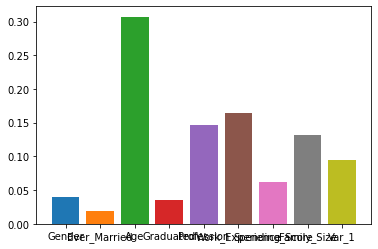

In [199]:
# Feature importance

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
for name, importance in zip(X_train.columns, classifier.feature_importances_):
    print(f'{name}: {importance}')
    # plot feature importance
    plt.bar(name, importance)
plt.show()

In [200]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=4)


# fit the model
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4948


In [201]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([2, 4, 1, ..., 2, 3, 1])

In [202]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.5104


In [203]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [204]:
y_pred_en = clf_en.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = clf_en.predict(X_train)

print(y_pred_train_en)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.4866
[2 2 1 ... 2 3 1]
Training-set accuracy score: 0.5116


In [205]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.5116
Test set score: 0.4866


In [206]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       0.61      0.68      0.64       692
           2       0.40      0.35      0.37       597
           3       0.36      0.41      0.38       552
           4       0.56      0.47      0.51       580

    accuracy                           0.49      2421
   macro avg       0.48      0.48      0.48      2421
weighted avg       0.49      0.49      0.48      2421



## K-means

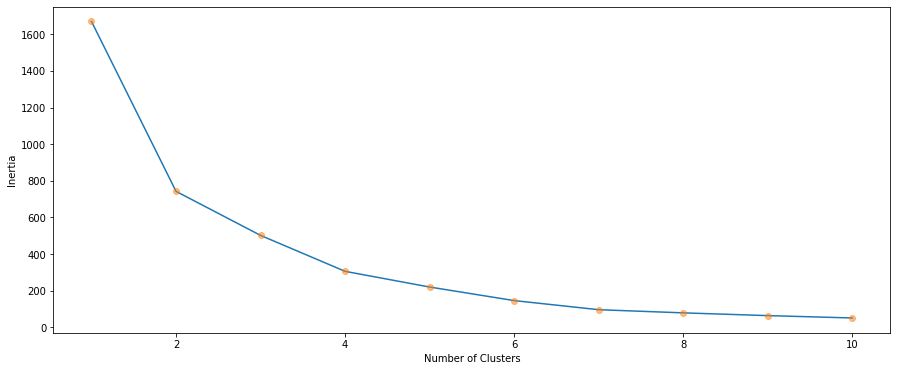

In [207]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for i in range(1 , 11):
    algorithm = KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 123  , algorithm='elkan')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , '-')
plt.plot(np.arange(1 , 11) , inertia , 'o' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

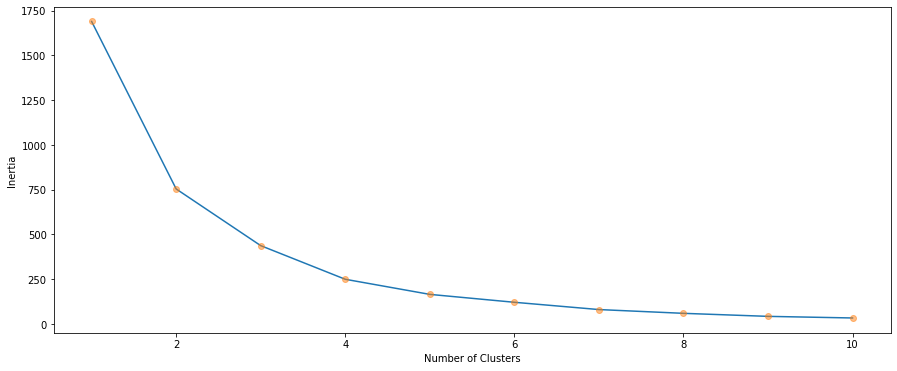

In [208]:
'''Profession and spending Score'''
X2 = df[['Profession' , 'Spending_Score']].iloc[: , :].values
inertia = []
for i in range(1 , 11):
    algorithm = KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 113  , algorithm='elkan')
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , '-')
plt.plot(np.arange(1 , 11) , inertia , 'o' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [216]:
from kneed import KneeLocator
X1 = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
X1.elbow

4

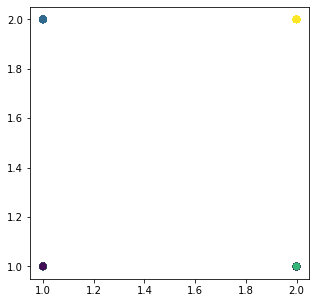

In [210]:
# K-means model
f, ax  = plt.subplots(figsize = (5,5))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=0)
y_kmeans_train = kmeansmodel.fit_predict(X_train)

plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_kmeans_train, alpha=0.7, s=40)

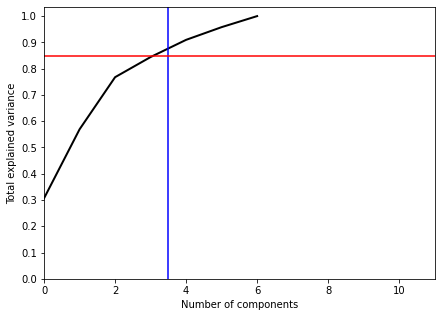

In [211]:
pca = PCA().fit(X_train.drop(columns=["Profession","Spending_Score"]))

plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 11)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3.5, c='b')
plt.axhline(0.85, c='r')
plt.show();

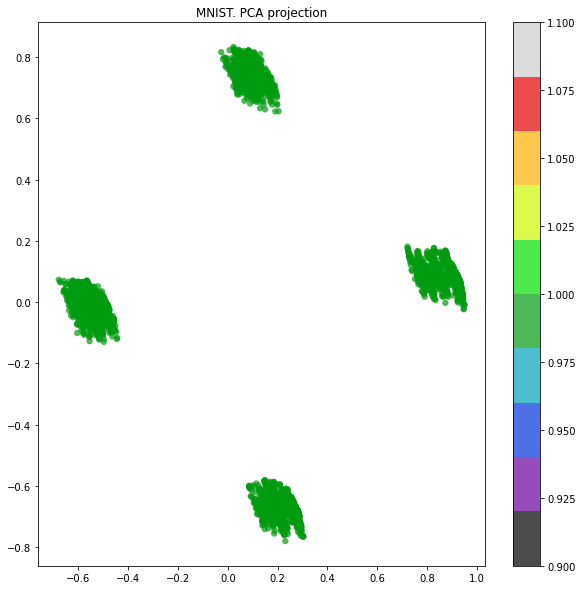

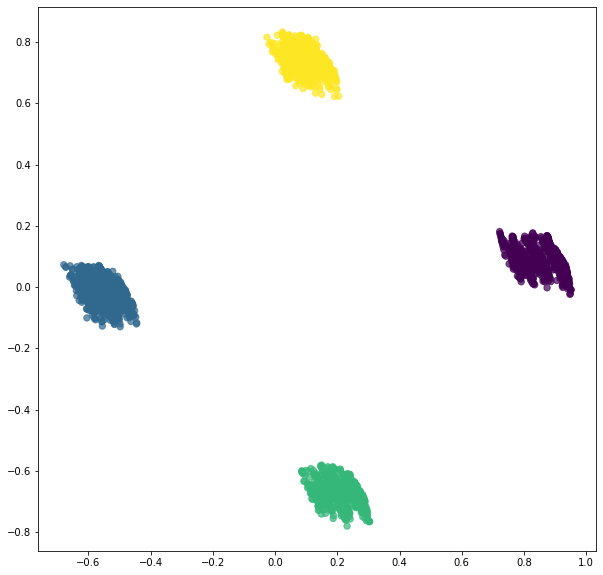

In [220]:
# Gender & Spending Score

pca = decomposition.PCA(n_components=2)
X_reduced_train = pca.fit_transform(X_train.drop(columns=["Gender","Spending_Score"]))

plt.figure(figsize=(10,10))
plt.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], c=[1]*X_train.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=0)
y_kmeans_train = kmeansmodel.fit_predict(X_reduced_train)

plt.scatter(X_reduced_train[:,0], X_reduced_train[:,1], c=y_kmeans_train, alpha=0.7, s=40)

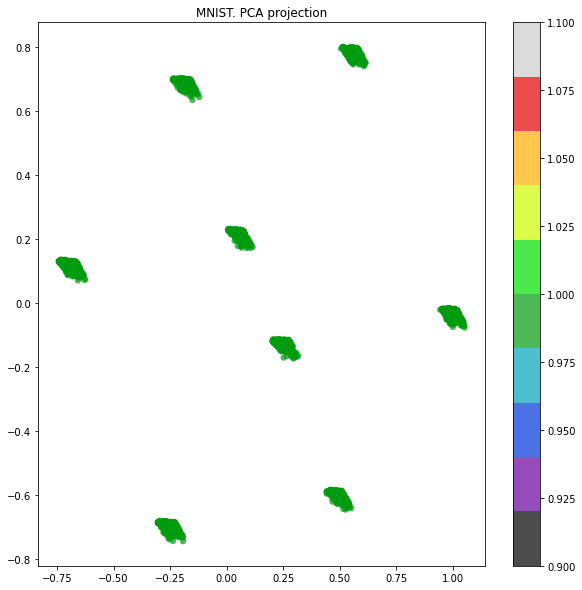

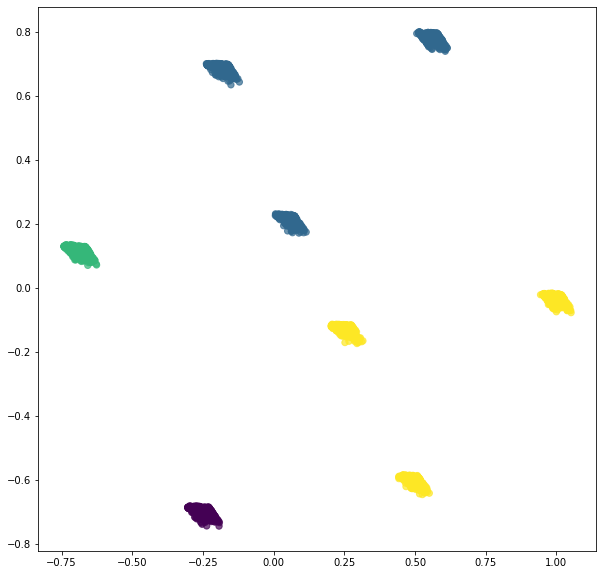

In [222]:
# Profession & Spending Score

pca = decomposition.PCA(n_components=2)
X_reduced_train = pca.fit_transform(X_train.drop(columns=["Profession","Spending_Score"]))

plt.figure(figsize=(10,10))
plt.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], c=[1]*X_train.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=0)
y_kmeans_train = kmeansmodel.fit_predict(X_reduced_train)

plt.scatter(X_reduced_train[:,0], X_reduced_train[:,1], c=y_kmeans_train, alpha=0.7, s=40)

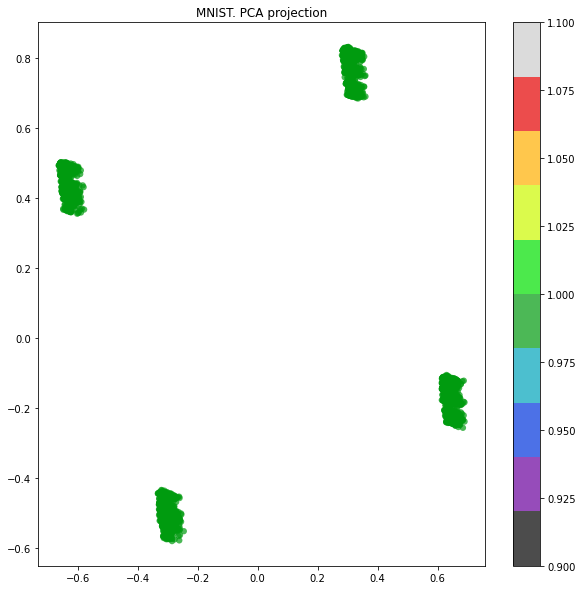

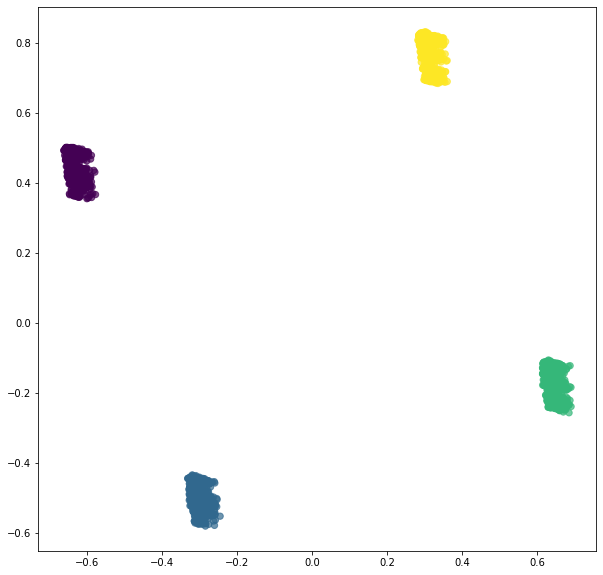

In [225]:
# Ever_Married & Spending Score

pca = decomposition.PCA(n_components=2)
X_reduced_train = pca.fit_transform(X_train.drop(columns=["Ever_Married","Spending_Score"]))

plt.figure(figsize=(10,10))
plt.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], c=[1]*X_train.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=0)
y_kmeans_train = kmeansmodel.fit_predict(X_reduced_train)

plt.scatter(X_reduced_train[:,0], X_reduced_train[:,1], c=y_kmeans_train, alpha=0.7, s=40)